This notebook shows the procedure that we followed to obtain representative profiles of the energy generation that we expect from new wind projects in each of the existing clusters of every loadzone.

Assuming that the new wind plants will establish in places where they maximize the energy that can be generated throughout the year (which varies depending on climatologic conditions) and minimize the price of connecting the plant to the electric grid (which implies that the project will be built near to an existing substation); clusters were made optimizing these two factors.

## Ratios divided by loadzone

In [1]:
import pandas as pd
import numpy as np
from geopy.distance import great_circle
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
mapa = pd.read_csv("mapa_mexico_w_lz_zonas_excluidas.csv")
wind = pd.read_csv("wind_generation_mexico.csv")
substations = pd.read_csv("subestaciones_w_lz.csv")

In [3]:
del mapa['X']
del mapa['Y']
del mapa['field_1']

In [4]:
filter_wind_gen = pd.Series([str(w) for w in wind['LAT']], index = [i for i in range(0, len(wind['LAT']))])
# Strangerly, this is not allowing me to find the indexes that I need. I suspect that the reason is that
# when it converts the Dataframe column to a Panda Series, it cuts the float to a %.3f

To solve the problem, the following scripts were used:

1.

```python
f = open("_WIND_GEN","w+")
for i in filter_wind_gen:
    f.write(i + " ")
f.write (" E ")
for i, row in mapa.iterrows():
    f.write(str(row['LAT']) + " ")
```

2.

```cpp
#include <iostream>
#include <map>
using namespace std;

map<string, int> g;

int main () {
  int x = 0;
  bool b = true;
  string s;

  while (cin >> s) {
    if (s == "E") {
      b = false;
      x = 0;
      continue;
    }

    if (b)
      g[s] = x++;
    else {
      x++;
      cout << g[s] << endl;
    }
  }

  return 0;
}
```

3.

```bash
./filter < _WIND_GEN > _t.csv
```

In [5]:
_temp = pd.read_csv("_t.csv")
add_g = []
for i, row in _temp.iterrows():
    add_g.append(wind.iloc[row['idx']][2])
mapa['GEN'] = add_g

In [6]:
distance_to_nearest_lz_substation_km = []
ratio = []
substations = substations.sort_values(['lz'], ascending = True)

for i, row in mapa.iterrows():
    min_distance = 10000000000.0
    for _i, _row in (substations.loc[substations['lz'] == row['lz']]).iterrows():
        if great_circle((row['LAT'], row['LON']), (_row['Y'], _row['X'])).kilometers < min_distance:
            min_distance = great_circle((row['LAT'], row['LON']), (_row['Y'], _row['X'])).kilometers
    distance_to_nearest_lz_substation_km.append(min_distance)
    
mapa['NEAREST_SUBSTATION'] = distance_to_nearest_lz_substation_km

for i, row in mapa.iterrows():
    ratio.append(row['GEN']/row['NEAREST_SUBSTATION'])
mapa['RATIO'] = ratio

In [7]:
mapa.to_csv("mexico_w_lz_ratio_wind.csv")

## Representative distances
The representative distance d of a loadzone is a distance, such that to optimize the generation/cost relation of a new project in the loadzone, this should be built in the area given by the circle of radius d that exists around a substation.

In [8]:
mexico = pd.read_csv("mexico_w_lz_ratio_wind.csv")
del mexico["Unnamed: 0"]
mexico = mexico.sort_values(['lz', 'RATIO'], ascending = [True, False])

In [9]:
mexico

,LAT,LON,lz,GEN,NEAREST_SUBSTATION,RATIO
17951,31.350316,-113.354598,1.0,3.497898e+06,0.447174,7.822235e+06
47891,28.204352,-111.027234,1.0,2.251253e+06,0.574257,3.920290e+06
81718,31.363192,-113.347662,1.0,3.493330e+06,1.155769,3.022516e+06
14334,28.666382,-111.798956,1.0,2.821684e+06,1.341591,2.103238e+06
63644,31.344701,-113.339633,1.0,3.494489e+06,1.729355,2.020689e+06
69012,31.015617,-110.679656,1.0,3.650223e+06,1.840325,1.983466e+06
22921,28.661072,-111.801576,1.0,2.821163e+06,1.438848,1.960710e+06
73784,29.121931,-110.535970,1.0,2.668161e+06,1.657842,1.609418e+06
43917,31.176209,-110.802056,1.0,3.666449e+06,2.401385,1.526806e+06
64677,30.814737,-112.702942,1.0,3.213989e+06,2.182714,1.472474e+06


In [10]:
plots = []
new_plot = []
c = -1

for i, row in mexico.iterrows():
    if (int(row['lz']) != c):
        if c != -1:
            plots.append(new_plot)
        new_plot = []
        c = int(row['lz'])
    new_plot.append(row['RATIO'])
    
# Add last loadzone.
plots.append(new_plot)

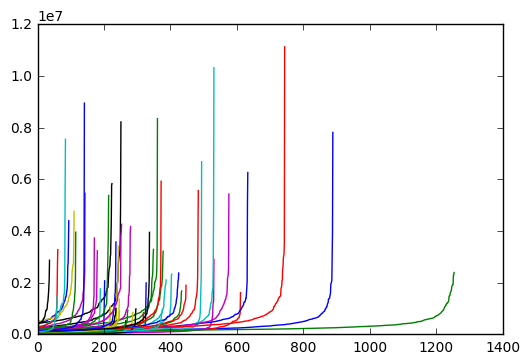

In [11]:
# Making a plot of the best 20% of each loadzone.

for p in plots:
    p = sorted(p)
    fp = int(len(p)*0.8)
    plt.plot(p[fp:])

In [12]:
media = []
media_idx = []
valores_alrededor = []

for p in plots:
    p = sorted(p)
    f = p[int(len(p)*0.8):]
    media.append(f[int(len(f)/2)])
    media_idx.append(int(len(f)/2))
    print (str(len(f)) + " / " + str(media_idx[-1]))
    valores_alrededor.append(f[int(len(f)/2 - len(f)*0.10):int(len(f)/2 + len(f)*0.10)])

890 / 445
350 / 175
612 / 306
495 / 247
532 / 266
239 / 119
252 / 126
634 / 317
1255 / 627
320 / 160
532 / 266
577 / 288
244 / 122
225 / 112
95 / 47
362 / 181
485 / 242
190 / 95
281 / 140
288 / 144
237 / 118
328 / 164
435 / 217
745 / 372
405 / 202
181 / 90
220 / 110
267 / 133
203 / 101
379 / 189
373 / 186
388 / 194
172 / 86
247 / 123
297 / 148
426 / 213
215 / 107
448 / 224
377 / 188
144 / 72
248 / 124
338 / 169
237 / 118
273 / 136
5 / 2
85 / 42
254 / 127
111 / 55
37 / 18
142 / 71
116 / 58
62 / 31
60 / 30


In [13]:
new_plants = []

for lz in range(1, 54):
    _df = mexico.loc[mexico['lz'] == lz]
    _df = _df.sort_values(by = ['RATIO'], ascending = [True])
    plant = []
    for i, row in _df.iterrows():
        if row['RATIO'] > valores_alrededor[lz-1][-1]:
            break
        if row['RATIO'] >= valores_alrededor[lz-1][0]:
            plant.append((row['LAT'], row['LON']))
    new_plants.append(plant)
new_plants

[[(30.82860252251945, -110.69898872493029),
  (29.146756646177288, -111.06671412474232),
  (28.989481942407387, -110.48554137782473),
  (29.208509603015198, -110.63525202144864),
  (31.522613731439233, -113.3519508187438),
  (29.13994561239501, -110.68114766785135),
  (31.324713731349593, -110.70876903831392),
  (28.676572863663868, -111.44960327364954),
  (28.279601460978469, -111.11484120049751),
  (30.921497469674549, -112.55015479311147),
  (30.568299382961239, -110.96481849388424),
  (29.232033481564546, -110.58578859767424),
  (31.434474615837196, -113.52960995201202),
  (31.37514795373048, -113.1611087694548),
  (29.336326116026783, -111.54392281779791),
  (31.52091810115045, -113.35831020603872),
  (29.120329307584683, -111.74608101659248),
  (30.27900219439957, -111.00687521120771),
  (30.94061131685535, -112.57859141225418),
  (31.230761089508171, -111.0181751754594),
  (28.75124029779213, -110.67607716683108),
  (28.738914235035921, -111.21564229885206),
  (28.72645587375572

In [14]:
representative_distances = []

for m in media:
    x = mexico.loc[mexico['RATIO'] == m]
    representative_distances.append(x.values[0][4])

In [15]:
for i in range(0, 53):
    print ("Loadzone " + str(i+1) + ": " + str(representative_distances[i]) + "km.")

Loadzone 1: 12.9689812158km.
Loadzone 2: 11.410112849km.
Loadzone 3: 14.7658352656km.
Loadzone 4: 17.250373012km.
Loadzone 5: 20.6953825776km.
Loadzone 6: 35.9765207371km.
Loadzone 7: 10.5217662602km.
Loadzone 8: 17.1576129902km.
Loadzone 9: 21.3994249484km.
Loadzone 10: 23.2407724754km.
Loadzone 11: 24.4143548115km.
Loadzone 12: 21.4258657026km.
Loadzone 13: 17.1899214687km.
Loadzone 14: 9.50492508819km.
Loadzone 15: 10.0168033103km.
Loadzone 16: 10.0096269574km.
Loadzone 17: 18.2461291884km.
Loadzone 18: 38.3087071426km.
Loadzone 19: 15.0667882042km.
Loadzone 20: 31.4805414565km.
Loadzone 21: 51.4031256195km.
Loadzone 22: 20.9067711985km.
Loadzone 23: 10.1721011289km.
Loadzone 24: 10.2421626561km.
Loadzone 25: 29.1779846701km.
Loadzone 26: 7.31575380523km.
Loadzone 27: 13.0006127528km.
Loadzone 28: 46.3885289516km.
Loadzone 29: 20.0525828712km.
Loadzone 30: 9.55632822051km.
Loadzone 31: 6.94116759719km.
Loadzone 32: 13.455497985km.
Loadzone 33: 8.690736537km.
Loadzone 34: 18.60378695

## Clustering "new plants" for every loadzone.
We use DBSCAN to generate clusters from the proposed locations of new plants.
For DBSCAN, we take $\epsilon = d$, being $d$ the representative distance of each loadzone. 

### Example for a single loadzone.

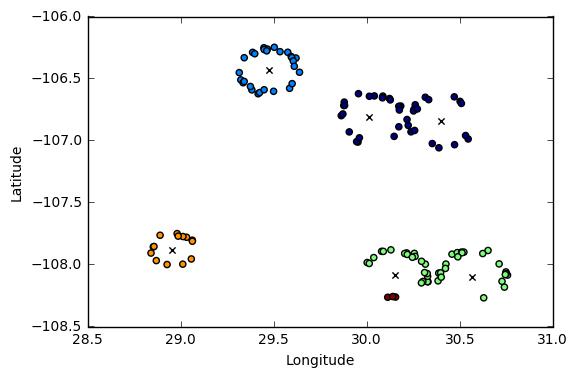

In [94]:
_lz = 7
distance_matrix = squareform(pdist(new_plants[_lz], (lambda u, v: great_circle(u, v).kilometers)))
db = DBSCAN(eps = representative_distances[_lz], min_samples = 1, metric = 'precomputed')
y_db = db.fit_predict(distance_matrix)
cluster = y_db

X = [a for (a,b) in new_plants[_lz]]
Y = [b for (a,b) in new_plants[_lz]]

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.scatter(X, Y, c = cluster)

# We can see how this clusters actually exist near or around existing substations.

_X = [row['X'] for i, row in (substations.loc[substations['lz'] == _lz + 1]).iterrows()]
_Y = [row['Y'] for i, row in (substations.loc[substations['lz'] == _lz + 1]).iterrows()]

plt.scatter(_Y, _X, c = 'black', marker='x')
plt.show()

### Obtaining all clusters.

In [93]:
centroids = []

for _lz in range(0, 53):
    distance_matrix = squareform(pdist(new_plants[_lz], (lambda u, v: great_circle(u, v).kilometers)))
    db = DBSCAN(eps = representative_distances[_lz], min_samples = 1, metric = 'precomputed')
    y_db = db.fit_predict(distance_matrix)
    cluster = y_db

    np_clusters_centroids = []
    
    for x in range(max(cluster) + 1):
        np_clusters_centroids.append([])

    i = 0
    for c in cluster:
        np_clusters_centroids[c].append((new_plants[_lz][i]))
        i = i + 1

    # A cluster will be taken into account to generate a representative profile (using its centroid),
    # iff the number of points in the clusters adds up to, at least, 10% of the total
    # of points in the loadzone.
    
    add_to_centroids = []
    for c in np_clusters_centroids:
        if (len(c) >= len(cluster) * 0.10):
            add_to_centroids.append((sum(pair[0] for pair in c)/len(c),sum(pair[1] for pair in c)/len(c)))
    
    centroids.append(add_to_centroids)
    
i = 1
for c in centroids:
    for _c in c:
        print(str(_c[0]) + ", " + str(_c[1]) + ", " + str(i))
    i = i + 1

29.0950105332, -110.819188826, 1
31.2420852945, -110.752496613, 1
30.811150523, -112.668227204, 1
29.9129937759, -109.290622871, 2
30.2740860325, -109.318926241, 2
30.6327150252, -109.79526309, 2
30.4556349297, -110.138193011, 2
29.8094869086, -109.085653095, 2
28.2238611494, -108.89387619, 3
28.6708223587, -110.355894714, 3
27.5356946611, -109.625252089, 3
25.8645045115, -108.50588562, 4
26.6673737039, -109.02336813, 4
25.3161071382, -107.945677308, 4
25.1100702222, -107.400111302, 5
24.459022052, -107.000249418, 5
23.1644662676, -105.89466293, 6
31.6228696964, -106.454555137, 7
31.597570749, -107.276395823, 7
30.1745353915, -106.799555845, 8
29.4738357452, -106.4188491, 8
30.3965912727, -108.009876219, 8
28.9596739995, -107.857042231, 8
28.6558443741, -106.324932914, 9
27.9856471171, -103.87601214, 9
28.3079520827, -104.808806266, 9
27.4743409334, -105.281555912, 9
23.9797925749, -104.682976986, 10
25.5371648955, -103.573075666, 11
29.0060231307, -101.081272704, 12
27.7400513072, -10

## Clustering for every loadzone (substation approach).
We use DBSCAN to generate clusters from the existing substations in each of the loadzones and their representative distances. For each of the clusters, we get its centroid as follows:
$$(\frac{\sum_{i}^{n} lat}{n}, \frac{\sum_{i}^{n} lon}{n})$$

In [25]:
substations = pd.read_csv("subestaciones_w_lz.csv")
distances = representative_distances

del substations['Unnamed: 0']
del substations['id']
subsations = substations.sort_values(by = ['lz'], ascending = [True])

In [24]:
substations

,X,Y,lz
0,-112.895770,28.425275,53.0
1,-115.945509,30.478875,47.0
2,-114.895930,30.941208,47.0
3,-115.125931,31.196484,47.0
4,-115.070860,31.345999,47.0
5,-115.676636,31.224190,47.0
6,-116.224101,30.952321,47.0
7,-116.279172,31.071706,47.0
8,-116.353679,31.165998,47.0
9,-116.437904,31.337699,47.0


In [28]:
centroids = []

for s in range(1, 54):
    X = []
    Y = []
    sub_lz = []

    for i, row in substations.iterrows():
        if (row['lz'] == s):
            sub_lz.append((row['X'], row['Y']))
            X.append(row['X'])
            Y.append(row['Y'])
        
    df = pd.DataFrame (index = [i for i in range(0, len(X))], columns = ['X', 'Y'])
    df['X'] = X
    df['Y'] = Y
    
    distance_matrix = squareform(pdist(sub_lz, (lambda u, v: great_circle(u, v).kilometers)))
    db = DBSCAN(eps = 2 * distances[s-1] + 1, min_samples = 1, metric = 'precomputed')
    y_db = db.fit_predict(distance_matrix)
    cluster = y_db

    df['cluster'] = cluster
    df = df.drop(df[df.cluster == -1].index)

    i = 0
    while True:
        _df = df.loc[df['cluster'] == i]
    
        if _df.empty:
            break
        
        centroids.append(((sum(_df['X'])/len(_df.index)), (sum(_df['Y']))/len(_df.index), s, i))
        
        i = i + 1

In [29]:
centroids

[(-113.353956419933, 31.354298903843304, 1, 0),
 (-112.68015268554301, 30.813313964394197, 1, 1),
 (-110.759164154324, 31.088313783028752, 1, 2),
 (-110.91141788276801, 30.4118489956285, 1, 3),
 (-110.53564272320401, 29.107028326887303, 1, 4),
 (-110.86174645363, 29.020094959398133, 1, 5),
 (-111.67592596601801, 29.248447940131502, 1, 6),
 (-111.811982489309, 28.670235782375894, 1, 7),
 (-111.35198186294599, 28.772507541671299, 1, 8),
 (-111.021558877812, 28.203070149368898, 1, 9),
 (-110.3898678768215, 30.637868845212147, 2, 0),
 (-109.98007858643501, 30.461980857488427, 2, 1),
 (-109.3597256290515, 30.151567235599849, 2, 2),
 (-109.13620419793199, 29.829031531804301, 2, 3),
 (-110.367191789606, 28.687288020593599, 3, 0),
 (-107.77563896502799, 28.471088201195503, 3, 1),
 (-108.35225946849701, 28.328609572211999, 3, 2),
 (-108.915922207842, 28.197360299746901, 3, 3),
 (-109.71714395610768, 27.485027006351569, 3, 4),
 (-109.23986631091449, 27.095386407727098, 3, 5),
 (-109.155640844116